In [1]:
%matplotlib inline
from dpm.train import train
from dpm.visualize import (
    plot_model, plot_models, plot_stats, 
    plot_hist, plot_loss_function, plot_loss_function_std
)
from dpm.distributions import Normal
from dpm.divergences import (
    forward_kl, reverse_kl, js_divergence, total_variation, 
    exponential_divergence, ForwardKL, ReverseKL, TotalVariation,
    HellingerDistance, Pearson, Neyman, Alpha
)
from dpm.mixture_models import MixtureModel
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

### Forward KL

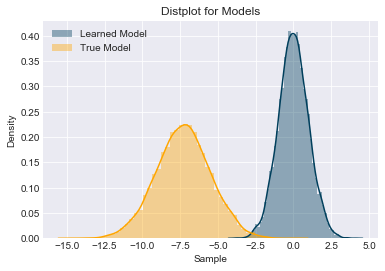

In [8]:
# Normal Examples:
p_model = Normal(-7.3, 3.2)
q_model = Normal(0., 1.)

plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/forward_kl_normal_init.png', bbox_inches='tight', dpi=300)

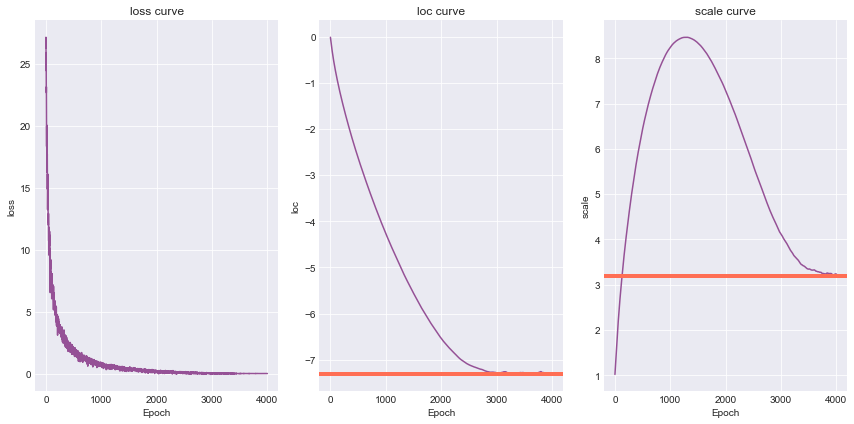

In [9]:
# Train
stats = train(p_model, q_model, forward_kl, epochs=4000)
plot_stats(stats, goals=[p_model.loc.item(), p_model.scale.item()])
plt.savefig('../Presentations/divergences/assets/forward_kl_normal_stats.png', bbox_inches='tight', dpi=300)

{'loc': -7.300000190734863, 'scale': 3.1999998092651367}
{'loc': -7.282926082611084, 'scale': 3.2358169555664062}


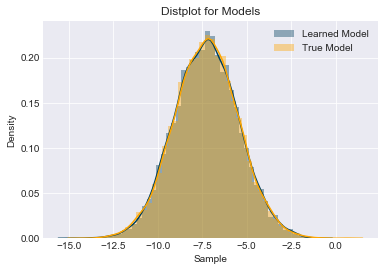

In [10]:
# Plot Result
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/forward_kl_normal_result.png', bbox_inches='tight', dpi=300)
pprint(p_model.get_parameters())
pprint(q_model.get_parameters())

### Forward KL Bimodal

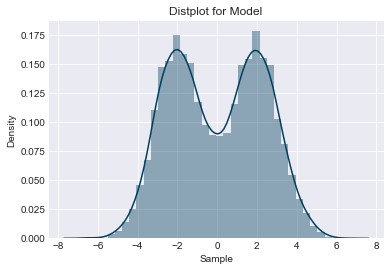

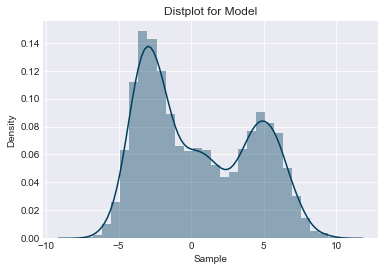

In [20]:
# plot a bimodal example
bimodal = MixtureModel([Normal(-2., 1.4), Normal(2., 1.4)], [0.5, 0.5])
plot_model(bimodal)
plt.savefig('../Presentations/divergences/assets/bimodal_example_1.png', bbox_inches='tight', dpi=300)
# plot a bimodal example
plt.show()
bimodal = MixtureModel([Normal(-3., 1.4), Normal(0.5, 1.7), Normal(5., 2.4)], [0.45, 0.2, 0.35])
plot_model(bimodal)
plt.savefig('../Presentations/divergences/assets/bimodal_example_2.png', bbox_inches='tight', dpi=300)

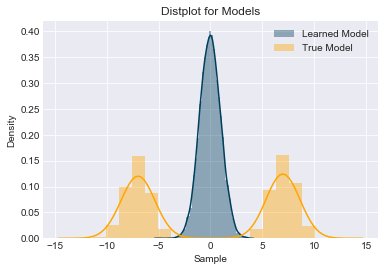

In [25]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/forward_kl_bimodal_init.png', bbox_inches='tight', dpi=300)

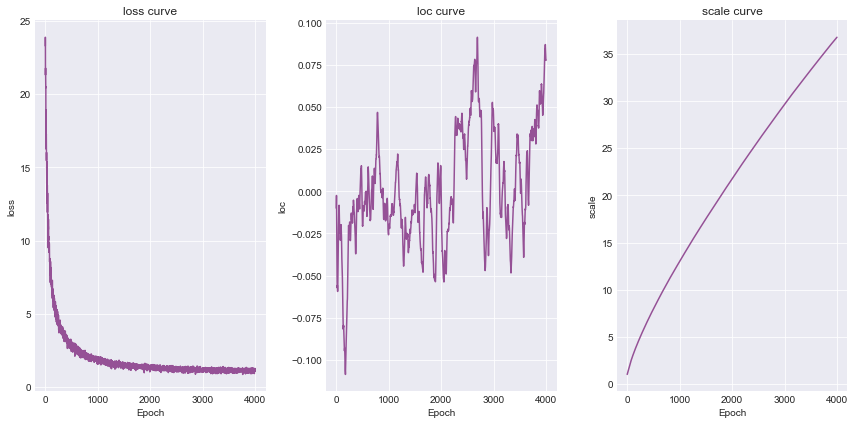

In [26]:
# Train
stats = train(p_model, q_model, forward_kl, epochs=4000)
plot_stats(stats)
plt.savefig('../Presentations/divergences/assets/forward_kl_bimodal_stats.png', bbox_inches='tight', dpi=300)

{'models': [{'loc': -7.0, 'scale': 1.4000000953674316},
            {'loc': 7.0, 'scale': 1.4000000953674316}],
 'probs': array([0.5, 0.5], dtype=float32)}
{'loc': 0.07765906304121017, 'scale': 36.756866455078125}


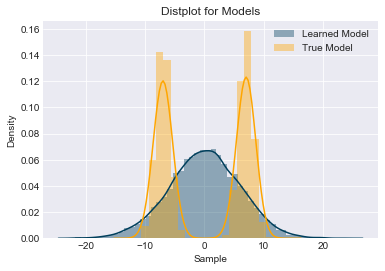

In [27]:
# Plot Result
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/forward_kl_bimodal_result.png', bbox_inches='tight', dpi=300)
pprint(p_model.get_parameters())
pprint(q_model.get_parameters())

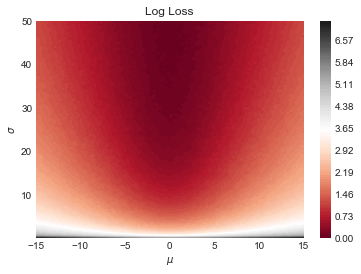

In [2]:
# plot loss dynamics
plot_loss_function(forward_kl, p_model=MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5]))
plt.savefig('../Presentations/divergences/assets/forward_kl_bimodal_loss.png', bbox_inches='tight', dpi=300)

### Reverse KL Bimodal

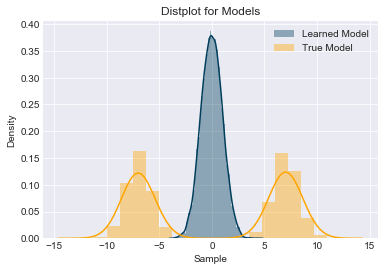

In [29]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/reverse_kl_bimodal_init.png', bbox_inches='tight', dpi=300)

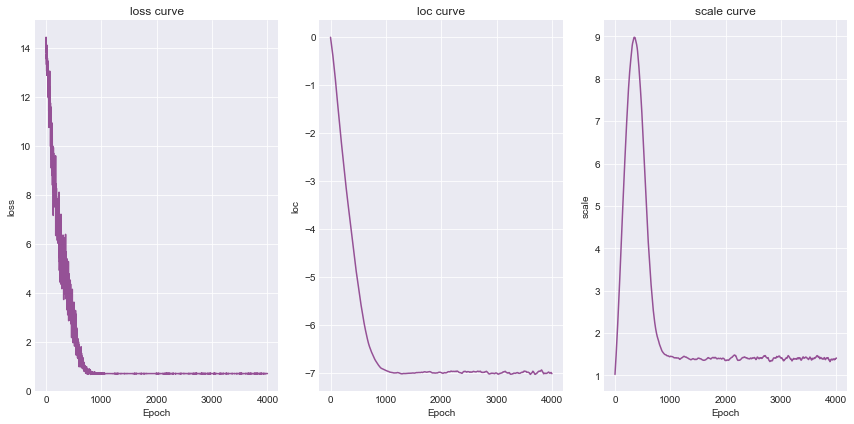

In [30]:
# Train (Mode Collapse)
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
stats = train(p_model, q_model, reverse_kl, epochs=4000)
plot_stats(stats)
plt.savefig('../Presentations/divergences/assets/reverse_kl_bimodal_stats_1.png', bbox_inches='tight', dpi=300)

{'models': [{'loc': -7.0, 'scale': 1.4000000953674316},
            {'loc': 7.0, 'scale': 1.4000000953674316}],
 'probs': array([0.5, 0.5], dtype=float32)}
{'loc': -7.020946502685547, 'scale': 1.4057528972625732}


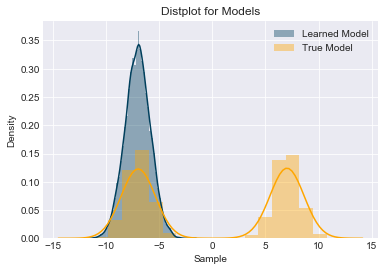

In [31]:
# Plot Result
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/reverse_kl_bimodal_result_1.png', bbox_inches='tight', dpi=300)
pprint(p_model.get_parameters())
pprint(q_model.get_parameters())

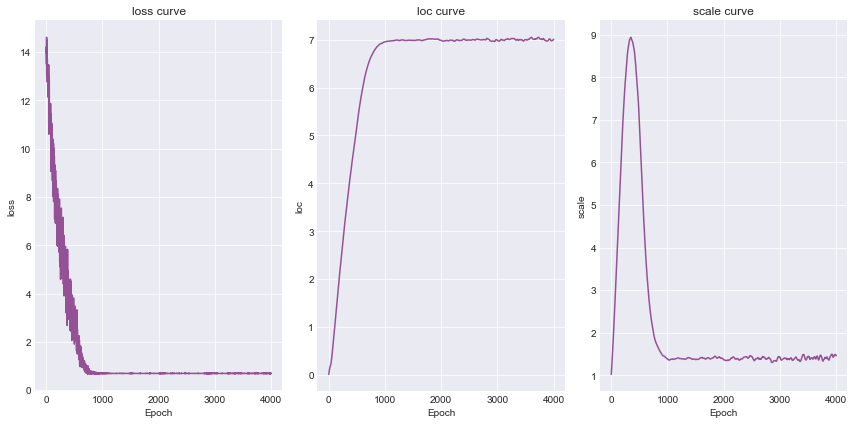

In [37]:
# Train 2 (Move to other side)
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
stats = train(p_model, q_model, reverse_kl, epochs=4000)
plot_stats(stats)
plt.savefig('../Presentations/divergences/assets/reverse_kl_bimodal_stats_2.png', bbox_inches='tight', dpi=300)

{'models': [{'loc': -7.0, 'scale': 1.4000000953674316},
            {'loc': 7.0, 'scale': 1.4000000953674316}],
 'probs': array([0.5, 0.5], dtype=float32)}
{'loc': 7.0091681480407715, 'scale': 1.4596256017684937}


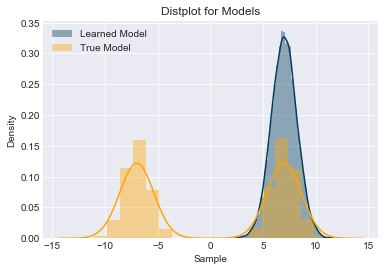

In [38]:
# Plot Result
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/reverse_kl_bimodal_result_2.png', bbox_inches='tight', dpi=300)
pprint(p_model.get_parameters())
pprint(q_model.get_parameters())

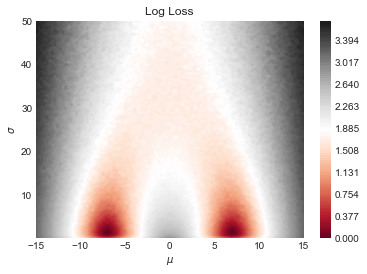

In [3]:
# plot loss dynamics
plot_loss_function(reverse_kl, p_model=MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5]))
plt.savefig('../Presentations/divergences/assets/reverse_kl_bimodal_loss.png', bbox_inches='tight', dpi=300)

### Jensen-Shannon Divergence

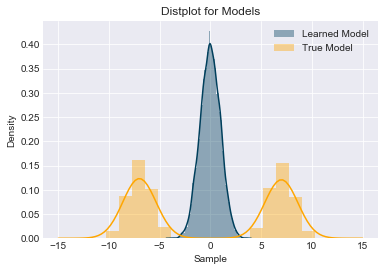

In [41]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/js_bimodal_center_init.png', bbox_inches='tight', dpi=300)

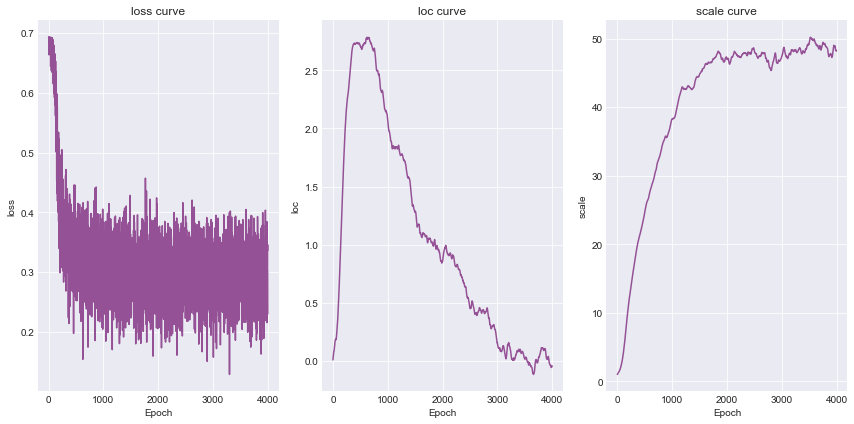

In [42]:
# Train
stats = train(p_model, q_model, js_divergence, epochs=4000, lr=0.01)
plot_stats(stats)
plt.savefig('../Presentations/divergences/assets/js_bimodal_center_stats.png', bbox_inches='tight', dpi=300)

{'models': [{'loc': -7.0, 'scale': 1.4000000953674316},
            {'loc': 7.0, 'scale': 1.4000000953674316}],
 'probs': array([0.5, 0.5], dtype=float32)}
{'loc': -0.04102920740842819, 'scale': 48.201934814453125}


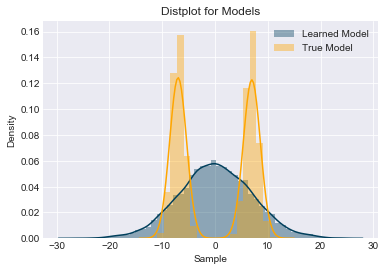

In [43]:
# Plot Result
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/js_bimodal_center_result.png', bbox_inches='tight', dpi=300)
pprint(p_model.get_parameters())
pprint(q_model.get_parameters())

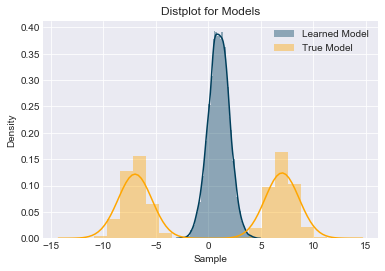

In [44]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(1., 1.)
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/js_bimodal_right_init.png', bbox_inches='tight', dpi=300)

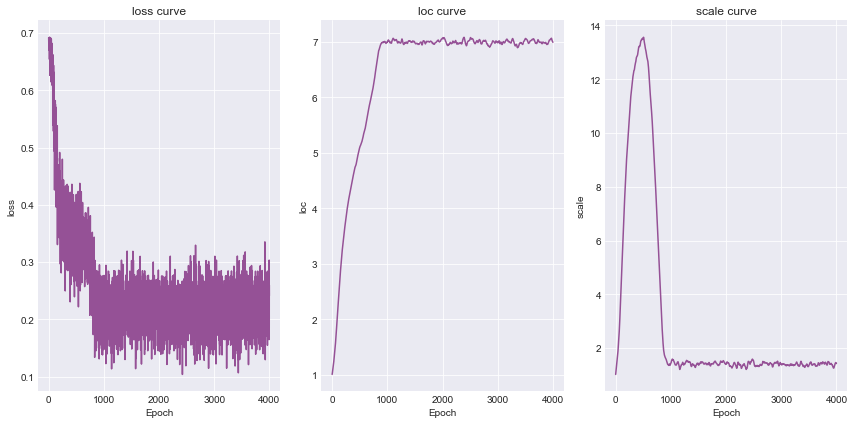

In [45]:
# Train
stats = train(p_model, q_model, js_divergence, epochs=4000, lr=0.01)
plot_stats(stats)
plt.savefig('../Presentations/divergences/assets/js_bimodal_right_stats.png', bbox_inches='tight', dpi=300)

{'models': [{'loc': -7.0, 'scale': 1.4000000953674316},
            {'loc': 7.0, 'scale': 1.4000000953674316}],
 'probs': array([0.5, 0.5], dtype=float32)}
{'loc': 6.992645263671875, 'scale': 1.4256573915481567}


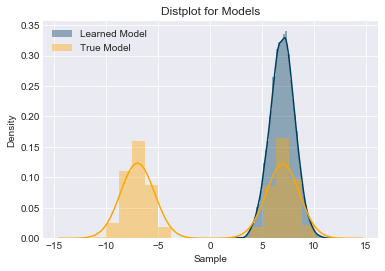

In [46]:
# Plot Result
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/js_bimodal_right_result.png', bbox_inches='tight', dpi=300)
pprint(p_model.get_parameters())
pprint(q_model.get_parameters())

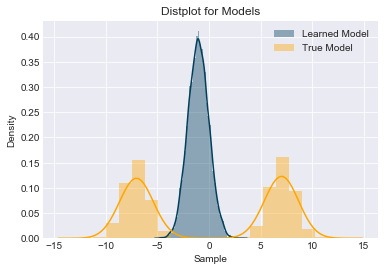

In [51]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(-1., 1.)
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/js_bimodal_left_init.png', bbox_inches='tight', dpi=300)

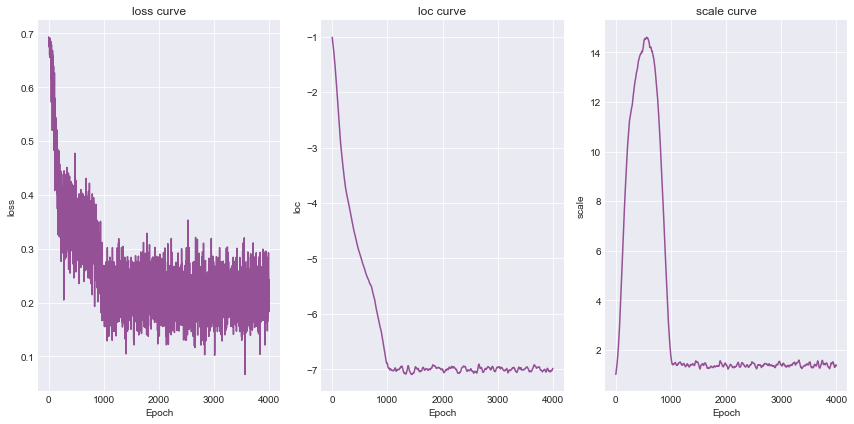

In [52]:
# Train
stats = train(p_model, q_model, js_divergence, epochs=4000, lr=0.01)
plot_stats(stats)
plt.savefig('../Presentations/divergences/assets/js_bimodal_left_stats.png', bbox_inches='tight', dpi=300)

{'models': [{'loc': -7.0, 'scale': 1.4000000953674316},
            {'loc': 7.0, 'scale': 1.4000000953674316}],
 'probs': array([0.5, 0.5], dtype=float32)}
{'loc': -6.984312057495117, 'scale': 1.3760281801223755}


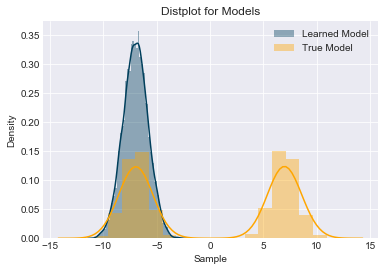

In [53]:
# Plot Result
plot_models(p_model, q_model)
plt.savefig('../Presentations/divergences/assets/js_bimodal_left_result.png', bbox_inches='tight', dpi=300)
pprint(p_model.get_parameters())
pprint(q_model.get_parameters())

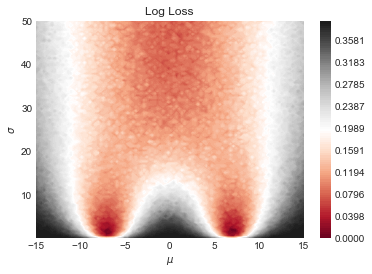

In [4]:
# plot loss dynamics
plot_loss_function(js_divergence, p_model=MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5]))
plt.savefig('../Presentations/divergences/assets/js_bimodal_loss.png', bbox_inches='tight', dpi=300)

### F-Divergence?

In [5]:

mu = [-7., 7.]
sigma = [1.4, 1.4]


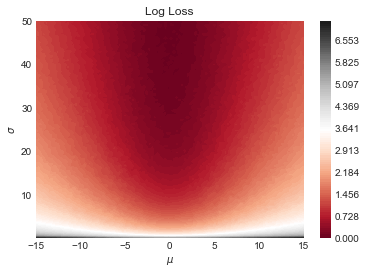

In [6]:
plot_loss_function(forward_kl, p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5,0.5]))

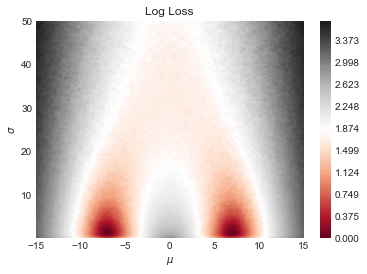

In [7]:
plot_loss_function(reverse_kl, p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

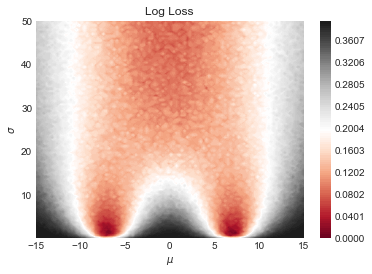

In [8]:
plot_loss_function(js_divergence, p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

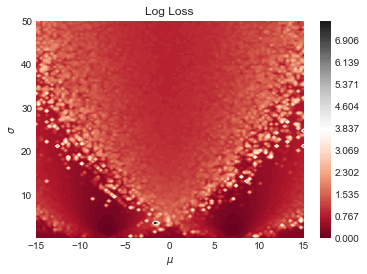

In [9]:
plot_loss_function(ForwardKL(), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

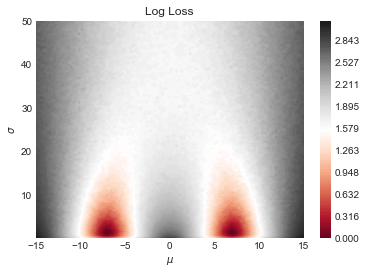

In [10]:
plot_loss_function(ReverseKL(), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

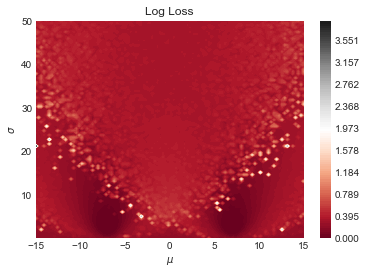

In [11]:
plot_loss_function(TotalVariation(), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

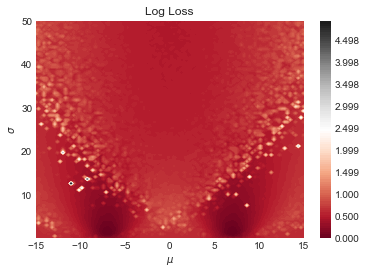

In [12]:
plot_loss_function(HellingerDistance(), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

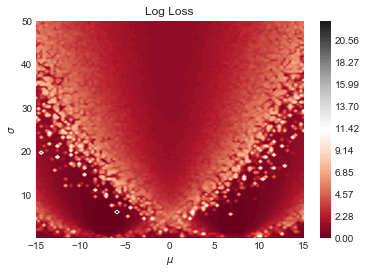

In [13]:
plot_loss_function(Pearson(), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

In [ ]:
plot_loss_function(Neyman(), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))

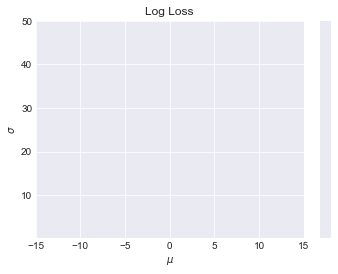

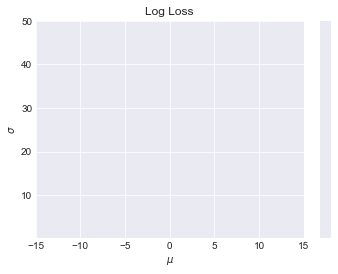

In [20]:
plot_loss_function(Alpha(1), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))
plt.show()
plot_loss_function(Alpha(-1), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))
plt.show()
plot_loss_function(Alpha(0), p_model=MixtureModel([Normal(mu[0], sigma[0]), Normal(mu[1], sigma[1])], [0.5, 0.5]))
plt.show()

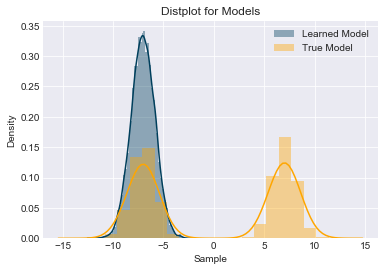

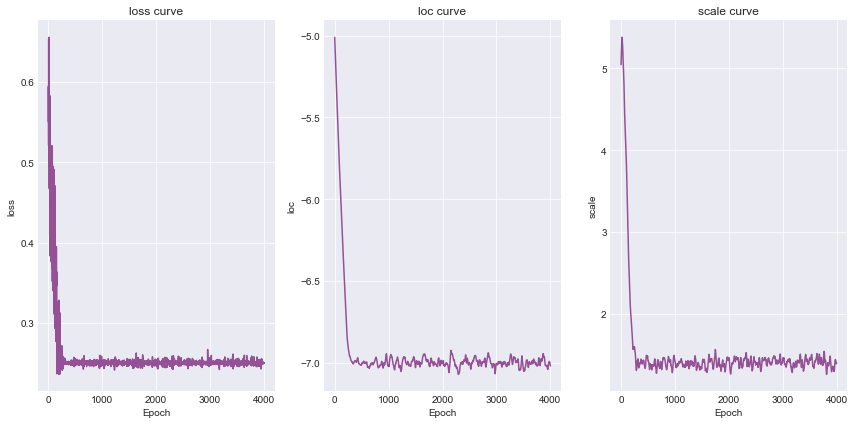

In [18]:
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(-5., 5.)
stats = train(p_model, q_model, Pearson(), epochs=4000, lr=0.01)
plot_models(p_model, q_model)
plt.show()
plot_stats(stats)
plt.show()